In [36]:
from itertools import product
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [37]:
imbook = cv2.imread('book.png')
imbook = cv2.cvtColor(imbook, cv2.COLOR_BGR2GRAY)
# print(imbook.shape)

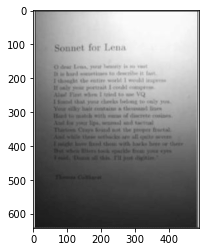

In [38]:
plt.imshow(imbook,cmap = "gray")

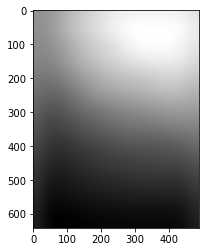

In [39]:
from scipy import ndimage as flt
fltbook = flt.gaussian_filter(imbook, sigma = 30)
plt.imshow(fltbook,cmap = "gray")

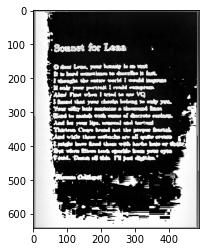

In [40]:
plt.imshow(imbook-fltbook, cmap='gray')

[[ 0.2129   0.2129   0.2129  ...  0.0586   0.0586   0.0586 ]
 [ 0.2129   0.2129   0.2129  ...  0.0586   0.0586   0.0586 ]
 [ 0.2129   0.2129   0.2129  ... -0.3066  -0.3066  -0.1113 ]
 ...
 [ 0.6143   0.6143   0.6143  ... -0.05273  0.336    0.502  ]
 [ 0.5537   0.5537   0.5713  ... -0.2168  -0.05273  0.3281 ]
 [ 0.288    0.288    0.4033  ...  0.295    0.295    0.3828 ]]
-1.871 0.621


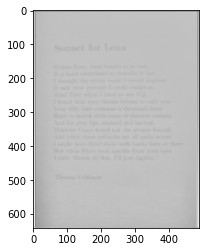

In [41]:
import numpy as np
res = np.log10(imbook) - np.log10(fltbook)
print(np.array(res))
minres = np.min(res)
maxres = np.max(res)
res = (res-minres)*255/(maxres-minres)
res = res.astype(int)
print(minres,maxres)
plt.imshow(res, cmap='gray')

# Task

Реализовать функцию flt.gaussian_filter только с использование numpy 


In [42]:
def my_gaussian_filter(img, k, sigma):
    # установления размер картинки по ширине и высоте
    v, s = img.shape[0], img.shape[1]
    rs_v = v - k + 1
    rs_s = s - k + 1

    #  3 на 3 пиксельные гаусса филтр преобразуем в строки и во все строки подбиблиотеку np.vstack 
    img_array = np.zeros((rs_v * rs_s, k * k))
    rw = 0
    for i, j in product(range(rs_v), range(rs_s)):
        window = np.ravel(img[i : i + k, j : j + k])
        img_array[rw, :] = window
        rw += 1
    center = k // 2
    x, y = np.mgrid[0 - center : k - center, 0 - center : k - center]
    g = 1 / (2 * np.pi * sigma) * np.exp(-(np.square(x) + np.square(y)) / (2 * np.square(sigma)))
    filter_array = np.ravel(g)
    # изменяем форму и получаем новые размеры нашего изображения
    rs = np.dot(img_array, filter_array).reshape(rs_v, rs_s).astype(np.uint8)
    return rs

In [45]:
imbook = cv2.imread('book.png')
gray = cv2.cvtColor(imbook, cv2.COLOR_BGR2GRAY)
gaussian = my_gaussian_filter(gray, 3,sigma=30)

результат вышел доволен. немного тускловатый. при более ярком. выходит сильный блик на одной стороны. потмоу что монотонна

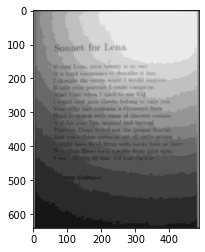

In [46]:
plt.imshow(gaussian,cmap = "gray")

In [49]:
gaussian2 = my_gaussian_filter(gray, 3,sigma=30)

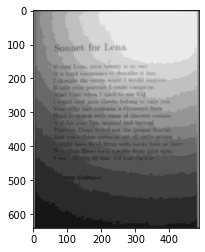

In [50]:
plt.imshow(gaussian2,cmap = "gray")

In [51]:
def convolution(oldimage, kernel):
    
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]
    return image_conv[h:h_end,w:w_end]

In [52]:
def GaussianBlurImage(image, sigma):
    #image = imread(image)
   # image = Image.open(image)
   # image = np.asarray(image)
    #print(image)
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    
    im_filtered = np.zeros_like(image, dtype=np.float32)
    for c in range(3):
        im_filtered[:, :, c] = convolution(image[:, :, c], gaussian_filter)
    return (im_filtered.astype(np.uint8))

In [27]:
imbook = cv2.imread('book.png')
imbook = cv2.cvtColor(imbook, cv2.COLOR_BGR2GRAY)

In [53]:
gaussian = GaussianBlurImage(imbook, sigma=30)

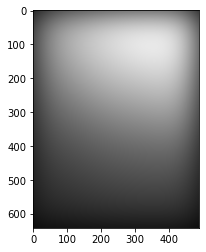

In [176]:
plt.imshow(gaussian,cmap = "gray")

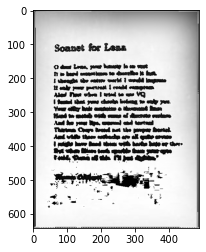

In [178]:
plt.imshow(gaussian-imbook, cmap = "gray")

In [55]:
def my_gaussian_filter(image, sigma):
    filt_razm = 2 * int(4 * sigma + 0.5) + 1  
    m = filt_razm//2
    n = filt_razm//2
    gaussian = np.zeros((filt_razm, filt_razm), np.float32)
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            gaussian[x+m, y+n] = (1/(2*np.pi*(sigma**2)))*(np.exp(-(x**2 + y**2)/(2* sigma**2)))
    im_filtered = np.zeros_like(image, dtype=np.float32)
    for c in range(3):
        oldimage=image[:, :, 2]
        image_h = oldimage.shape[0]
        image_w = oldimage.shape[1]
        center_h = gaussian.shape[0]
        center_w = gaussian.shape[1]
        image_pad = np.pad(oldimage, pad_width=((center_h // 2, center_h // 2),(center_w // 2, center_w // 2)), mode='constant', constant_values=0).astype(np.float32)  
        h = center_h // 2
        w = center_w // 2
        image_conv = np.zeros(image_pad.shape)
        for i in range(h, image_pad.shape[0]-h):
            for j in range(w, image_pad.shape[1]-w):
                
                x = image_pad[i-h:i-h+center_h, j-w:j-w+center_w]
                x = x.flatten()*gaussian.flatten()
                image_conv[i][j] = x.sum()
        h_end = -h
        w_end = -w
        if(h == 0):
            return image_conv[h:,w:w_end]
        if(w == 0):
            return image_conv[h:h_end,w:]
        im_filtered[:, :, c] = image_conv[h:h_end,w:w_end]
    return (im_filtered.astype(np.uint8))

In [59]:
gaussian = my_gaussian_filter(imbook, sigma=30)

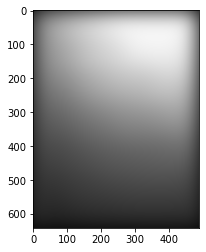

In [60]:
plt.imshow(gaussian,cmap = "gray")

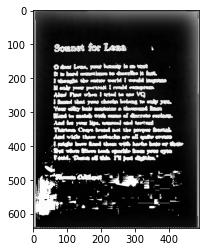

In [62]:
plt.imshow(gaussian-imbook,cmap = "gray")